<a href="https://colab.research.google.com/github/lauracline/Support-Vector-Machines/blob/master/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machines**

This is a "new" learning method invented by Vladimir Vapnik in the 1990s. It is likely to best classifier at its time, but now its been surpassed by gradient boosted trees and neural networks. 

We will discuss three different, but very closely related classifiers below#

* Maximum Margin Classifier

* Support Vector Classifier 

* Support Vector Machine

## **Maximum Margin Classifier**

A Maximum Margin Classifier is an optimal hyperplane that separates classes. 

A **hyperplane** means that for any *p* dimensional space, it is a *p* - 1 dimensional flat surface. A line has two dimensions and a plane has three dimensions. The mathematical definition in *p* dimensions is:

$\beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p} = 0$.

It divides whatever your dimension is into two pieces. 

### **Linearly Separable Case**

First, we will look at two-dimensional data that is perfectly linearly separable. Here, the hyperplane is a line. 

Many different lines can be drawn here to separate the data. For math simplication, let *y* = -1 for one class and the other 1, then if $\beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p} > 0$, we will classify the observation as 1 and if $\beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p} < 0$ then we will classify it as -1. 

Multiplying both equations by *y* yields $y(\beta_{0} + \beta_{1}X_{1} + ... + \beta_{p}X_{p}) > 0$ for any correctly classified observations. 

If the data is perfectly separable then an infinite number of hyperplanes will exist that can perfectly separate the data. A natural choice is to choose a hyperplane that maximizes the distance from each observation to the hyperplane - one that has the largest margin - the maximum margin. 

## **Non-Seperable Data**

If the data is not linearly separable, then no hyperplane can separate the data and thus no margin can exist. This case is most common with real data. The maximum margin classifier is very sensitive to single data points. The hyperplane can change drastically with the addition of one new data point. To help combat this type of overfitting and to allow for non-separable classification, we can use a soft margin. We allow some observations to be on the wrong side of the hyperplane or within the margin. This margin violation makes the margin "soft". 

The problem formulation is tweaked such that we allow for some total amount of error, *C*. This total error acts as an allowance like a balance in the bank that you can spend on the amount of error you can make. The errors are called slack variables. *C* is chosen through cross-validation. 

## **Support Vector Machines**

For data that has a non-linear separating hyperplane, something different must be done. We can transform the variables as in previous chapters -squaring them, creating interaction terms, etc. - or we can use kernels. The support vector machine can enlarge the feature space without doing these transformations in an efficient using kernels. 

The solution to SVMs involves only inner products of the observations. The decision boundary is just a weighted sum of the inner product between observations that are the support vectors. The inner product can be replaced with a kernel function. There are several different kernel functions. 

* Linear kernel is just the standard inner product 

* Polynomial kernel is a linear kernel taken to the power of a chosen polynomial 

* Radial Basis Function is proportional to the squared distance between points 

All kernels measure a degree of closeness. So the further the two points in the kernel function are, the smaller the result of the kernel calculation. 

Kernsl allow for very high dimensional (infinite with the radial basis function) feature space enlargement without actually going into that space. 

## **Multi-Class Support Vector Machine**

Two different approaches for *K* classes where *K* > 2. One vs. One constructs a different SVM for every pair of classes that exist. Test observations are assigned to the class that gets the most votes. One vs. All constructs *K* SVMs where all observations ar eused - each class is compared to all other *K*-1 classes. The class with the greatest distance from the hyperplane is chosen. 

## **Excercises**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Question One**

This problem involves hyperplanes in two dimensions. 

A. Sketch the hyperplane $1 + 3X_{1} - X_{2} = 0$. Indixate the set of points for which $1 + 3X_{1} - X_{2} > 0$, as well as the set of points for which $1 + 3X_{1} - X_{2} < 0$.

(-1.0, 3.0)

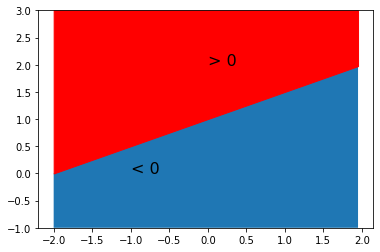

In [12]:
section = np.arange(-2, 2, 1/20.)
f = lambda x:1 + 0.5*x
plt.fill_between(section, f(section), y2=-1)
plt.fill_between(section, f(section), y2 = 3, color='r')
plt.text(0, 2, "> 0", fontsize=16)
plt.text(-1, 0, "< 0", fontsize=16)
plt.ylim(-1, 3)

B. On the same plot, sketch the hyperplane $-2 + X_{1} + 2X_{2} = 0$. Indicate the set of points for which $-2 + X_{1} + 2X_{2} > 0$, as well as the set of points for which $-2 + X_{1} + 2X_{2} < 0$.

(-2.0, 2.0)

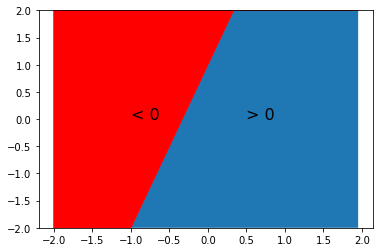

In [9]:
section = np.arange(-2, 2, 1/20.)
f = lambda x:1 + 3*x
plt.fill_between(section, f(section), y2=-2)
plt.fill_between(section, f(section), y2 =2, color='r')
plt.text(0.5, 0, "> 0", fontsize=16)
plt.text(-1, 0, "< 0", fontsize=16)
plt.ylim(-2, 2)

### **Question Two**

We have seen that in *p* = 2 dimensions, a linear decision boundary takes the form $\beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} = 0$. We now investigate a non-linear decision boundary. 

A. Sketch the curve

$(1 + X_{1})^{2} + (2 - X_{2})^{2} = 4$

B. On your sketch, indicate the set of points for which 

$(1 + X_{1})^{2} + (2 - X_{2})^{2} > 4$

as well as the set of points for which

$(1 + X_{1})^{2} + (2 - X_{2})^{2} \le 4$

(-1.0, 5.0)

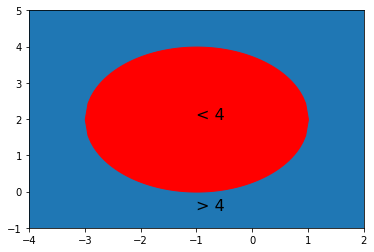

In [13]:
section = np.arange(-3, 1.05, 1/20.)
f = lambda x: 2 + np.sqrt(4 - (1 + x)**2)
g = lambda x: 2 - np.sqrt(4 - (1 + x)**2)
plt.fill_between(np.arange(-5, 5), -10, 10)
plt.fill_between(section, g(section), f(section), color='r')
plt.text(-1, 2, "< 4", fontsize=16)
plt.text(-1, -0.5, "> 4", fontsize=16)
plt.xlim(-4, 2)
plt.ylim(-1, 5)

C. Suppose that a classifier assigns an observation to the blue class if

$(1 + X_{1})^{2} + (2 - X_{2})^{2} > 4$,

and to the red class otherwise. To what class is the observation (0,0) classified? (-1,1)? (2,2)? (3,8)?

**Answer**

(0,0) = blue

(-1,1) = red 

(2,2) = blue

(3,8) = blue


D. Argue that while the decision boundary in (C) is not linear in terms of $X_{1}$ and $X_{2}$, it is linear in terms of $X_{1}$, $X_{1}^{2}$, and $X_{2}^{2}$.

**Answer:** x1, x2, x1^2, and x^2 are linear in four dimensions. When it is projected down to two dimensions, we get a circle. 

### **Question Three**

Here we explore the maximal margin classifier on a toy dataset. 

A. We are given *n* = 7 observations in *p* = 2 dimensions. For each observation, there is an associated class label. Sketch the observations. 

In [14]:
df = pd.DataFrame(np.array([[3, 4, -1], [2, 2, -1], [4, 4, -1], [1, 4, -1],
                            [2, 1, 1], [4, 3, 1], [4, 1, 1]]),
                  columns = ['x1', 'x2', 'y'])
df['color'] = df['y'].map({1: 'r', -1:'b'})
df

,x1,x2,y,color
0,3,4,-1,b
1,2,2,-1,b
2,4,4,-1,b
3,1,4,-1,b
4,2,1,1,r
5,4,3,1,r
6,4,1,1,r


B. Sketch the optimal separating hyperplane, and provide the equation of this hyperplane. 

(0.0, 5.0)

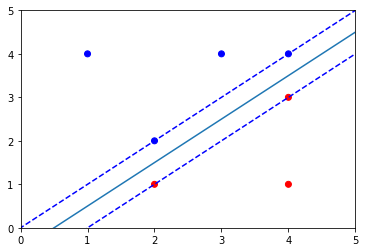

In [17]:
plt.scatter(df['x1'], df['x2'], color=df['color'])
# Maximum separating hyperplane is x1 - x2 - 0.5 = 0
section = np.arange(-3,8)
f = lambda x: x - 0.5
plt.plot(section, f(section))
plt.plot(section, f(section) + 0.5, 'b--')
plt.plot(section, f(section) - 0.5, 'b--')
plt.ylim(0,5)
plt.xlim(0,5)

D. On your sketch, indicate the margin for the maximal margin hyperplane. 

**Answer:** classification rule is x1 - x2 - 0.5 > 0 then red else blue. 

E. Indicate the support vectors for the maximal margin classifier. 

In [19]:
# Margin is distance from support vector to line 
print("margin is", 0.5 / np.sqrt(2))

margin is 0.35355339059327373


F. Argue that a slight movement in the seventh observation would not affect the maximal margin hyperplane. 

**Answer:** pont (4,1) is far from the hyperplane and changing it slightly will have no effect on it. 

G. Sketch a hyperplane that is *not* equal to the optimal separating hyperplane, and provide the equation for this hyperplane. 

H. Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane. 

(0.0, 5.0)

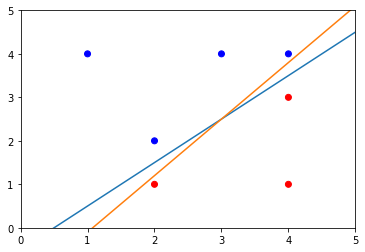

In [21]:
# Green line is non-optimal hyerplane. Still separates data but worse margin
plt.scatter(df['x1'], df['x2'], color=df['color'])

# Maximum separating hyperplane is x1 - x2 - 0.5 = 0
section = np.arange(-3,8)
f = lambda x: x - 0.5
g = lambda x: 1.3 * x - 1.4
plt.plot(section, f(section))
plt.plot(section, g(section))
plt.ylim(0,5)
plt.xlim(0,5)

### **Question Four**

Generate a simulated two-class dataset with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions. 

(0.0, 1.0)

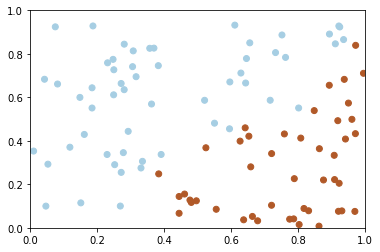

In [22]:
# Create fake data where true boundary is x2 - x1 = 0
X = np.random.rand(100,2)
d = 3 * (X[:,0] - X[:,1])
n= np.random.rand(100)
y = np.where(n > d, 0, 1)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlim(0,1)
plt.ylim(0,1)

In [23]:
from sklearn.svm import SVC

In [24]:
clf = SVC(kernel='linear', C=10)

In [25]:
clf.fit(X,y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
clf.intercept_, clf.coef_

(array([-1.32072974]), array([[ 7.26301142, -6.92613786]]))

(0.0, 1.0)

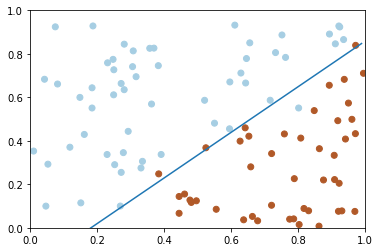

In [27]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
section = np.arange(0,1,0.01)

beta0 = clf.intercept_
beta1 = clf.coef_[0,0]
beta2 = clf.coef_[0,1]

f = lambda x: (beta0 + beta1 * x) / -beta2
plt.plot(section, f(section))
plt.xlim(0,1)
plt.ylim(0,1)

Use the sklearn code below to plot decision boundaries for svm. 

In [28]:
h = 0.02 #step size in the mesh

C = 1.0 #SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X,y)
rbf_svc = SVC(kernel='rbf', gamma = 0.7, C=C).fit(X,y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X,y)

In [29]:
# Create a mesh to plot in
xx, yy = np.meshgrid(np.arange(0, 1, h),
                     np.arange(0, 1, h))

In [30]:
# Title for the plots
titles = ['Linear kernel',
          'Polynomial kernel',
          'RBF kernel']

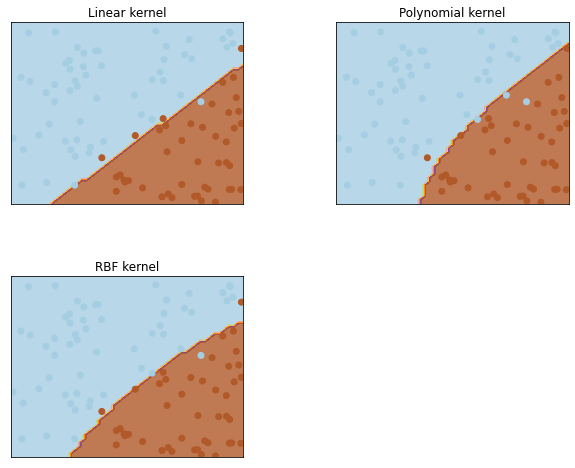

In [31]:
plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
  
  # Plot the decision boundary. For that we will assign a colour to each
  # point in the mesh [x_min, x_max]x[y_min, y_max]
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a colour plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  # Plot also the training points
  plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

In [32]:
# Linear support vector classifier actually does worse. Might need some tuning
svc.score(X,y), rbf_svc.score(X,y), poly_svc.score(X,y)

(0.95, 0.97, 0.96)

### **Question Five**

We have see that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision-boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features. 

A. Generate a dataset with *n* = 500 and *p* = 2, such that the observations belong to two classes with a quadratic decision boundary between them. 

In [33]:
X = np.random.rand(500,2) - 0.5
y = (X[:,0]**2 - X[:,1]**2 > 0) *1

B. Plot the observations, coloured according to their class labels. Your plot should display $X_{1}$ on the x-axis and X_{2}$ on the y-axis. 

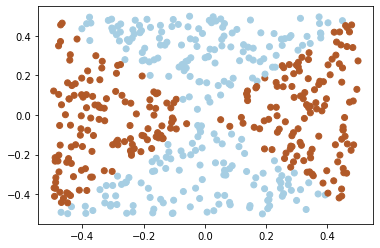

In [34]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)

C. Fit a logistic regression model to the data, using $X_{1}$ and $X_{2}$ as predictors. 

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_clf = LogisticRegression()

In [37]:
log_clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

D. Apply this model to the *training data* in order to obtain a predicted class label for each training observation. Plot the observations, coloured according to *predicted* class labels. The decision boundary should be linear. 

Text(0.5, 1.0, 'Logistic Regression with only 2 linear features')

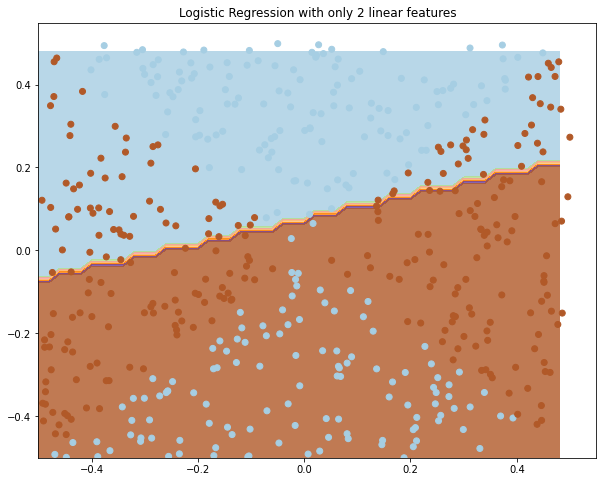

In [38]:
h = 0.02

xx, yy = np.meshgrid(np.arange(-0.5, 0.5, h),
                     np.arange(-0.5, 0.5, h))

plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a colour plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 2 linear features")

E. Now fit a logistic regression model to the data using non-linear functions of $X_{1}$ and $X_{2}$ as predictors (e.g., $X_{1}^{2}$, $X_{1}$ x $X_{2}$, log($X_{2}$), and so forth).

In [41]:
X_new = np.column_stack((X, X**2, X[:,0] * X[:,1]))

In [42]:
X_new.shape

(500, 5)

In [43]:
log_clf.fit(X_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

F. Apply this model to the *training data* in order to obtain a predicted class label for each training observation. Plot the observations coloured to the *predicted class* labels. The decision boundary should be obviously non-linear. If it is not, then repeat steps A to E until you come up with an example in which the predicted class labels are obviously non-linear. 

Text(0.5, 1.0, 'Logistic Regression with only 5 features: X_1, X_2, X_1^2, X_2^2, X_1*X_2')

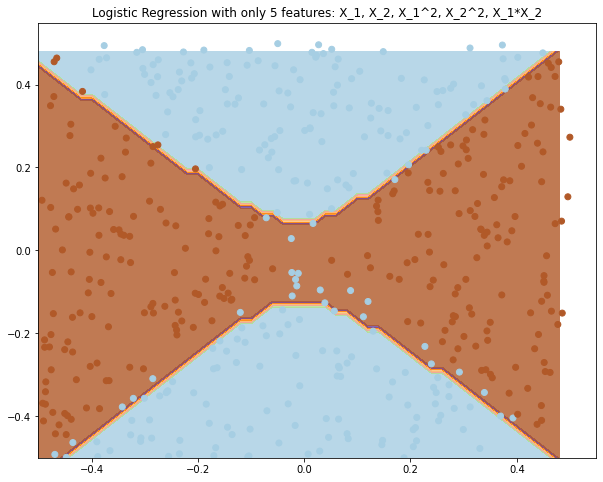

In [45]:
h = 0.02

xx, yy = np.meshgrid(np.arange(-0.5, 0.5, h),
                     np.arange(-0.5, 0.5, h))

plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel()])

# Put the result into a colour plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points 
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 5 features: X_1, X_2, X_1^2, X_2^2, X_1*X_2")

G. Fit a support vector classifier to the data with $X_{1}$ and $X_{2}$ as predictors. Obtain a class prediction for each training observation. Plot the observations, coloured according to the *predicted class labels*. 

H. Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, coloured according to the *predicted class labels*.

In [47]:
h = 0.02 # Step size in the mesh

C = 1.0 # SVM regularization parameter
svc = SVC(kernel = 'linear', C=C).fit(X,y)
poly_svc = SVC(kernel='poly', degree=2, C=1).fit(X,y)
rbf_svc = SVC(kernel = 'rbf', gamma = 0.5, C=1).fit(X,y)

In [48]:
# Create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-0.5, 0.5, h),
                     np.arange(-0.5, 0.5, h))

In [49]:
# Title for the plots
titles = ['Linear kernel',
          'Polynomial kernel',
          'RBF kernel']

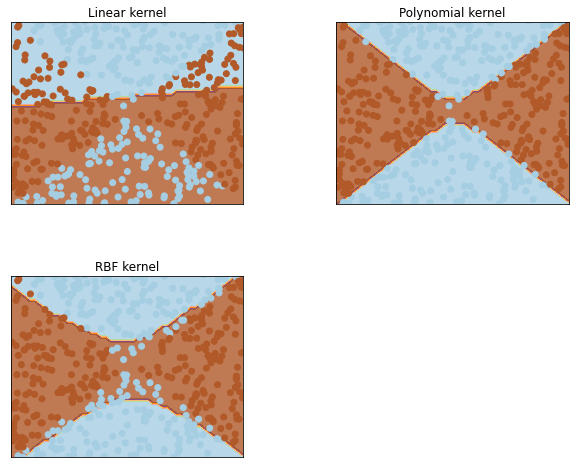

In [50]:
plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace = 0.4, hspace=0.4)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into the colour plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  # Plot also the training points
  plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

Linear kernel fails here. Use polynomial or RBF. 

### **Question Six**

It is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of `cost` that misclassifies a couple of training observations may perform better on test data than one with a huge value of `cost` that does not misclassify any training observations. You will now investigate this claim. 

A. Generate two-class data with *p* = 2 in such a way that the classes are just barely linearly separable. 

In [56]:
# Make a linear decision boundary at x2 > 0.5
X = np.random.rand(500, 2)
y = (X[:, 1] > .5) * 1

X_train = X[:250]
X_test = X[250:]
y_train = y[:250]
y_test = y[250:]

(0.0, 1.0)

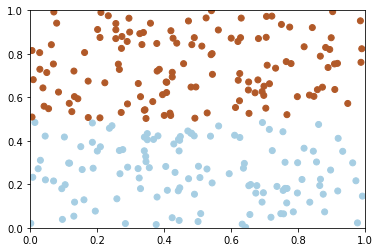

In [57]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1)

B. Compute the cross-validation error rates for support vector classifiers with a range of `cost` values. How many training errors are misclassified for each value of `cost` considered, and how does this relate to the cross-validation errors obtained?

C. Generate an appropriate test dataset, and compute the test errors corresponding to each of the values of `cost` considered. Which values of `cost` leads to the fewest test errors, and how does this compare to the values of `cost` that yields the fewest training errors and the fewest cross-validation errors?

In [58]:
all_C = np.logspace(-2,-1, 100)
train_scores = []
test_scores = []
for c in all_C:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    train_scores.append(svc.score(X_train, y_train))
    test_scores.append(svc.score(X_test, y_test))

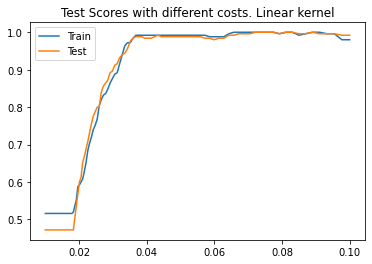

In [59]:
plt.plot(all_C, train_scores, label="Train")
plt.plot(all_C, test_scores, label="Test")
plt.title("Test Scores with different costs. Linear kernel")
plt.legend()

### **Question Seven**

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the `Auto` dataset. 

In [60]:
auto = pd.read_csv("https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Auto%202.csv")

In [61]:
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


A. Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with a gas mileage below the median.

In [63]:
auto['y'] = (auto['mpg'] > auto['mpg'].median()) *1
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,y
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


B. Fit a support vector classifier to the data with various values of `cost`, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter.

In [65]:
X = pd.concat((pd.get_dummies(auto[['cylinders', 'origin', 'year']].astype(object)), 
               auto[['displacement', 'horsepower', 'weight', 'acceleration']],), axis=1)
y = auto['y']

In [66]:
X.head()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,displacement,horsepower,weight,acceleration
0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,307.0,130,3504,12.0
1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,350.0,165,3693,11.5
2,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,318.0,150,3436,11.0
3,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,304.0,150,3433,12.0
4,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,302.0,140,3449,10.5


In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
X_new = auto.iloc[:, 1:7]

In [69]:
for c in np.logspace(-4, 1, 10):
  clf = SVC(kernel='linear', C=c)
  scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
  print("Linear SVM with c={} has test accuracy of {}".format(round(c,4), round(scores.mean(), 3)))

Linear SVM with c=0.0001 has test accuracy of 0.908
Linear SVM with c=0.0004 has test accuracy of 0.918
Linear SVM with c=0.0013 has test accuracy of 0.934
Linear SVM with c=0.0046 has test accuracy of 0.972
Linear SVM with c=0.0167 has test accuracy of 0.99
Linear SVM with c=0.0599 has test accuracy of 0.995
Linear SVM with c=0.2154 has test accuracy of 0.992
Linear SVM with c=0.7743 has test accuracy of 0.99
Linear SVM with c=2.7826 has test accuracy of 0.992
Linear SVM with c=10.0 has test accuracy of 0.99


C. Now repeat (B), this time using SVMs with radial and polynomial basis kernels, with different values of `gamma` and `degree` and `cost`. 

In [70]:
for c in np.logspace(-2, 3, 10):
  gamma = 0.00001
  clf = SVC(kernel='rbf', gamma=gamma, C=c)
  scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
  print("RBF SVM with c={} and gamma={} has test accuracy of {}".format(round(c,4), gamma, round(scores.mean(), 3)))

RBF SVM with c=0.01 and gamma=1e-05 has test accuracy of 0.822
RBF SVM with c=0.0359 and gamma=1e-05 has test accuracy of 0.88
RBF SVM with c=0.1292 and gamma=1e-05 has test accuracy of 0.883
RBF SVM with c=0.4642 and gamma=1e-05 has test accuracy of 0.88
RBF SVM with c=1.6681 and gamma=1e-05 has test accuracy of 0.883
RBF SVM with c=5.9948 and gamma=1e-05 has test accuracy of 0.883
RBF SVM with c=21.5443 and gamma=1e-05 has test accuracy of 0.885
RBF SVM with c=77.4264 and gamma=1e-05 has test accuracy of 0.911
RBF SVM with c=278.2559 and gamma=1e-05 has test accuracy of 0.934
RBF SVM with c=1000.0 and gamma=1e-05 has test accuracy of 0.952
